<a href="https://colab.research.google.com/github/elmagekx3-source/pizza-sales-python/blob/main/Copy_of_pizza_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **sales pizza analysis**

**1-import libararies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**import raw data**

In [ ]:
df=pd.read_csv('/content/pizza_sales.csv')

**explore data**

In [ ]:
# to explore the numrecal data
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [ ]:
# toknow data type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [ ]:
# to know the dta type
df.dtypes

,0
pizza_id,int64
order_id,int64
pizza_name_id,object
quantity,int64
order_date,object
order_time,object
unit_price,float64
total_price,float64
pizza_size,object
pizza_category,object


**KPI'S and calculations**

In [ ]:
# calculate revenue
total_rev=df['total_price'].sum()
# calculate total QTY
total_qty=df['quantity'].sum()
# calculate the num orders
num_orders=df['order_id'].nunique()
# calculate the AOV
AOV=total_rev/num_orders
# calculate the average pizza per orders
pizza_per_order=total_qty/num_orders


**draw cards**

Text(0.5, 0.3, '817860.05')

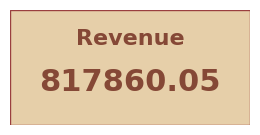

In [ ]:
title="Revenue"
value=total_rev
#_______________________________________________
fig , ax=plt.subplots(figsize=(3.1,1.5))
ax.axis('off')
#  color the card by rectangle
rect=plt.Rectangle((0,0),1,1,color='#E6CFA9',ec='#9A3F3F')
ax.add_patch(rect)
# add text in card
ax.text(0.5,0.7,title,fontsize=16,ha='center',fontweight='600',color='#854836')
ax.text(0.5,0.3,value,fontsize=22,ha='center',fontweight='600',color='#854836')

**funcation for draw card**

In [ ]:
def draw_card(title,value):
  fig , ax=plt.subplots(figsize=(3.1,1.5))
  ax.axis('off')
#  color the card by rectangle
  rect=plt.Rectangle((0,0),1,1,color='#E6CFA9',ec='#9A3F3F')
  ax.add_patch(rect)
# add text in card
  ax.text(0.5,0.7,title,fontsize=16,ha='center',fontweight='600',color='#854836')
  ax.text(0.5,0.3,f'{value:.1f}',fontsize=22,ha='center',fontweight='600',color='#854836')


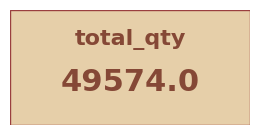

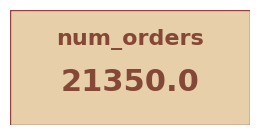

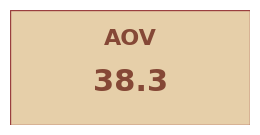

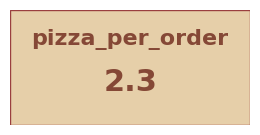

In [ ]:
draw_card('total_qty',total_qty)
draw_card('num_orders',num_orders)
draw_card('AOV',AOV)
draw_card('pizza_per_order',pizza_per_order)


**ingredients analysis**

In [ ]:
x=(
    df['pizza_ingredients'].str.split(',')
    .explode().
    value_counts().
    reset_index()
    )

In [ ]:
x.head(10)

,pizza_ingredients,count
0,Garlic,27422
1,Tomatoes,23694
2,Red Onions,19547
3,Red Peppers,16284
4,Chicken,8443
5,Mushrooms,8114
6,Mozzarella Cheese,6605
7,Pepperoni,6542
8,Green Olives,6174
9,Artichokes,5682


**time analysis**

/tmp/ipython-input-277119899.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chart=df.groupby('day_name',as_index=False)['total_price'].sum()
/tmp/ipython-input-277119899.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chart,x='day_name',y='total_price',palette='RdYlGn')


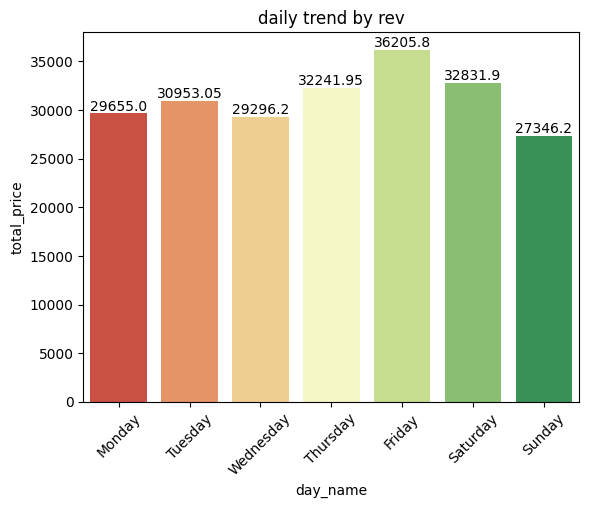

In [ ]:
# daily trend by rev
type (df['order_date'])
# step 1 convert data type
df['order_date']=pd.to_datetime(df['order_date'],dayfirst=True)
# step 2 create new column
df['day_name']=df['order_date'].dt.day_name()
# create list
week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df['day_name']=pd.Categorical(df['day_name'],categories=week,ordered=True)
# create char using groubpy
chart=df.groupby('day_name',as_index=False)['total_price'].sum()
sns.barplot(data=chart,x='day_name',y='total_price',palette='RdYlGn')
plt.title('daily trend by rev')
plt.xticks(rotation=45)
for i, v  in enumerate(chart['total_price']):
  plt.text(i,v,v,ha='center',va='bottom')
plt.show()

/tmp/ipython-input-2568146483.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chart=df.groupby('day_name',as_index=False)['quantity'].sum()
/tmp/ipython-input-2568146483.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chart,x='day_name',y='quantity',palette='managua')


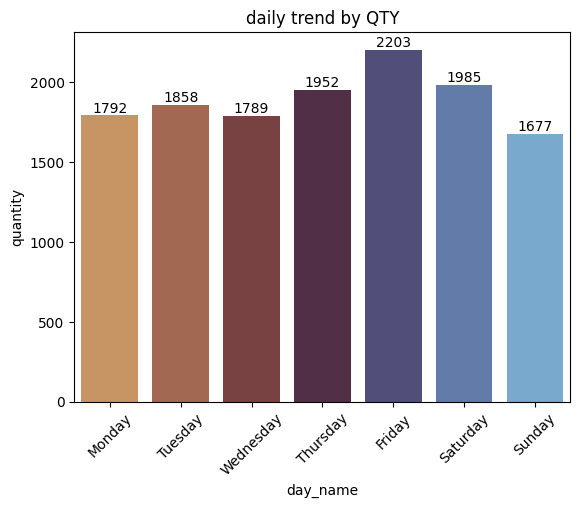

In [ ]:
# daily trend by QTY
type (df['order_date'])
# step 1 convert data type
df['order_date']=pd.to_datetime(df['order_date'],dayfirst=True)
# step 2 create new column
df['day_name']=df['order_date'].dt.day_name()
# create list
week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df['day_name']=pd.Categorical(df['day_name'],categories=week,ordered=True)
# create char using groubpy
chart=df.groupby('day_name',as_index=False)['quantity'].sum()
sns.barplot(data=chart,x='day_name',y='quantity',palette='managua')
plt.title('daily trend by QTY')
plt.xticks(rotation=45)
for i, v  in enumerate(chart['quantity']):
  plt.text(i,v,v,ha='center',va='bottom')
plt.show()

In [ ]:
describe=df.describe()

In [ ]:
describe

,pizza_id,order_id,quantity,order_date,unit_price,total_price
count,13014.000000,13014.000000,13014.000000,13014,13014.000000,13014.000000
mean,6507.500000,2862.860458,1.018595,2015-02-17 07:46:36.680497920,16.484786,16.791924
min,1.000000,1.000000,1.000000,2015-01-01 00:00:00,9.750000,9.750000
25%,3254.250000,1442.000000,1.000000,2015-01-24 00:00:00,12.500000,12.750000
50%,6507.500000,2881.000000,1.000000,2015-02-17 00:00:00,16.500000,16.500000
75%,9760.750000,4273.750000,1.000000,2015-03-13 00:00:00,20.250000,20.500000
max,13014.000000,5710.000000,4.000000,2015-04-06 00:00:00,35.950000,62.250000
std,3756.962536,1644.930608,0.139573,NaN,3.638293,4.386810


/tmp/ipython-input-2276870827.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chart=df.groupby('day_name',as_index=False)['order_id'].sum()
/tmp/ipython-input-2276870827.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chart,x='day_name',y='order_id',palette='PuOr')


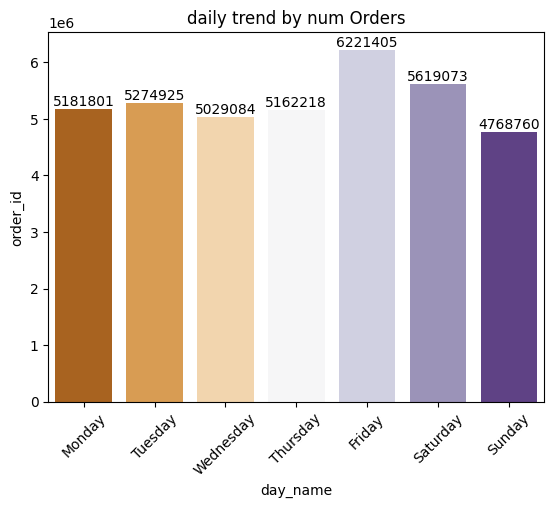

In [ ]:
# daily trend by num Orders
type (df['order_date'])
# step 1 convert data type
df['order_date']=pd.to_datetime(df['order_date'],dayfirst=True)
# step 2 create new column
df['day_name']=df['order_date'].dt.day_name()
# create list
week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df['day_name']=pd.Categorical(df['day_name'],categories=week,ordered=True)
# create char using groubpy
chart=df.groupby('day_name',as_index=False)['order_id'].sum()
sns.barplot(data=chart,x='day_name',y='order_id',palette='PuOr')
plt.title('daily trend by num Orders')
plt.xticks(rotation=45)
for i, v  in enumerate(chart['order_id']):

  plt.text(i,v,v,ha='center',va='bottom')
plt.show()

**hour analysis**

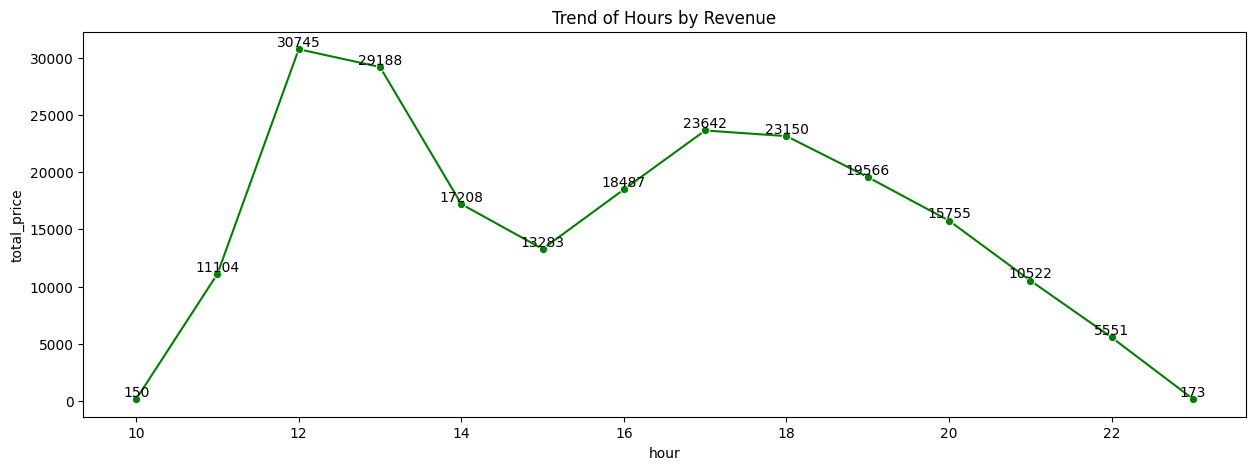

In [ ]:
# step 1 convert data type
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')

# step 2 create the column
df['hour'] = df['order_time'].dt.hour

# group by hour
chart = df.groupby('hour', as_index=False)['total_price'].sum()

# draw the chart
plt.figure(figsize=(15,5))
sns.lineplot(data=chart, x='hour', y='total_price', marker='o', color='green')
plt.title('Trend of Hours by Revenue')

# add labels
for i, v in enumerate(chart['total_price']):
    x_position = chart['hour'].iloc[i]
    plt.text(x_position, v + 0.5, int(v), ha='center', va='bottom')

plt.show()


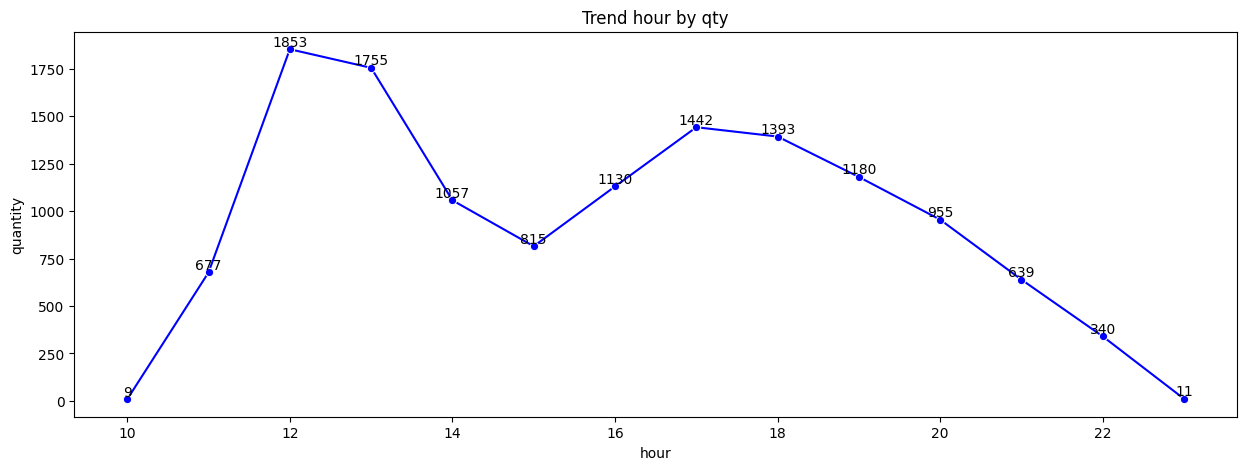

In [ ]:
# step 1 convert data type
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')

# step 2 create the column
df['hour'] = df['order_time'].dt.hour

# group by hour
chart = df.groupby('hour', as_index=False)['quantity'].sum()

# draw the chart
plt.figure(figsize=(15,5))
sns.lineplot(data=chart, x='hour', y='quantity', marker='o', color='blue')
plt.title('Trend hour by qty')

# add labels
for i, v in enumerate(chart['quantity']):
    x_position = chart['hour'].iloc[i]
    plt.text(x_position, v + 0.5, int(v), ha='center', va='bottom')

plt.show()

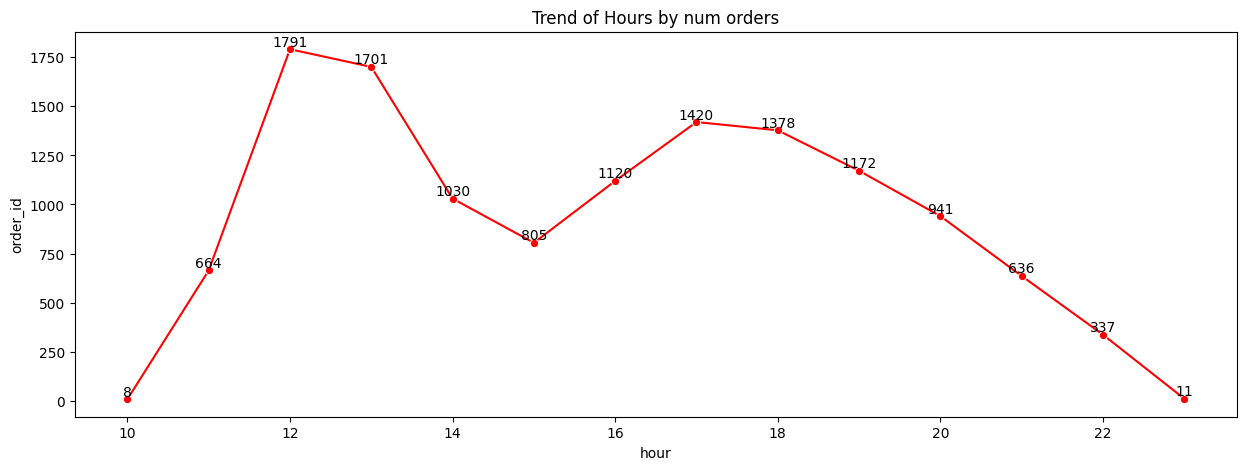

In [ ]:
# step 1 convert data type
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')

# step 2 create the column
df['hour'] = df['order_time'].dt.hour

# group by hour
chart = df.groupby('hour', as_index=False)['order_id'].count()

# draw the chart
plt.figure(figsize=(15,5))
sns.lineplot(data=chart, x='hour', y='order_id', marker='o', color='red')
plt.title('Trend of Hours by num orders')

# add labels
for i, v in enumerate(chart['order_id']):
    x_position = chart['hour'].iloc[i]
    plt.text(x_position, v + 0.5, int(v), ha='center', va='bottom')

plt.show()

/tmp/ipython-input-2765587173.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chart = df.groupby('month name', as_index=False)['total_price'].sum()
/tmp/ipython-input-2765587173.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chart, x='month name', y='total_price', palette='Pastel2')


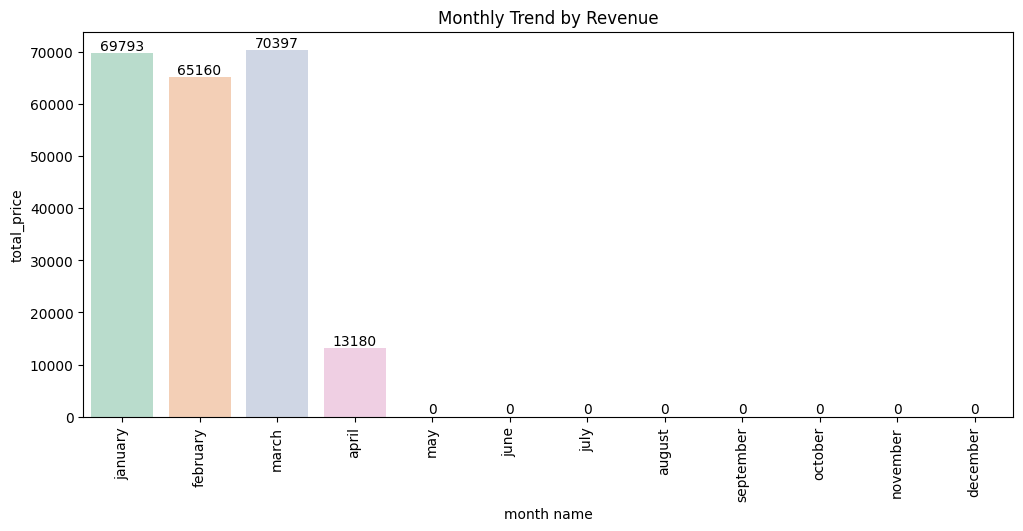

In [ ]:
# monthly trend
type(df['order_date'][0])

# تحويل العمود لتاريخ (dayfirst=True عشان التاريخ عندك شكله يوم/شهر/سنة)
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

# استخراج اسم الشهر النصي
df['month name'] = df['order_date'].dt.month_name().str.lower()

# ترتيب الأشهر بالترتيب الصحيح
months = ['january','february','march','april','may','june',
          'july','august','september','october','november','december']

df['month name'] = pd.Categorical(df['month name'], categories=months, ordered=True)

# تجميع البيانات حسب الشهر
chart = df.groupby('month name', as_index=False)['total_price'].sum()

# رسم المخطط
plt.figure(figsize=(12,5))
sns.barplot(data=chart, x='month name', y='total_price', palette='Pastel2')

plt.title('Monthly Trend by Revenue')
plt.xticks(rotation=90)

# كتابة القيم فوق الأعمدة
for i, v in enumerate(chart['total_price']):
    plt.text(i, v, f"{v:.0f}", ha='center', va='bottom')

plt.show()



**% for categories**

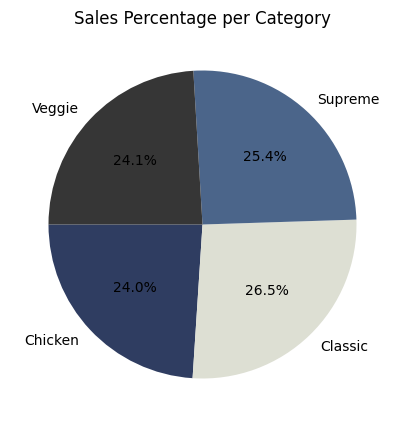

In [ ]:
# حساب إجمالي المبيعات لكل فئة
category_sales = df.groupby('pizza_category', as_index=False)['total_price'].sum()

# حساب النسبة المئوية لكل فئة
category_sales['%sales'] = (category_sales['total_price'] / category_sales['total_price'].sum()) * 100

# رسم مخطط دائري
plt.figure(figsize=(5,5))
plt.pie(
    category_sales['%sales'],
    labels=category_sales['pizza_category'],
    autopct='%1.1f%%',
    colors=['#2f3d61','#dddfd3','#4b658a','#363636'],
    startangle=180
)
plt.title('Sales Percentage per Category')
plt.show()




**sales by pizza cat&size %**

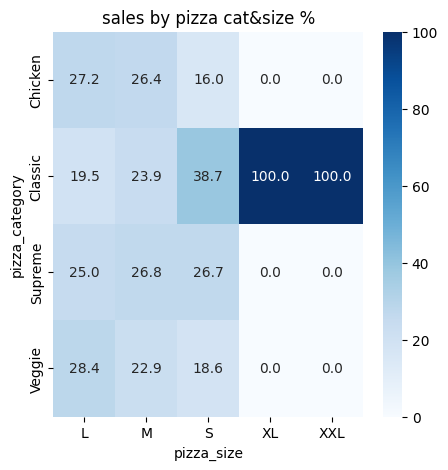

In [ ]:
sales_pivot=df.pivot_table(
    index=['pizza_category'],
    columns=['pizza_size'],
    values='total_price',
    aggfunc='sum'
)
per=sales_pivot/sales_pivot.sum()*100
plt.figure(figsize=(5,5))
sns.heatmap(per.fillna(0).round(1), annot=True, fmt=".1f", cmap='Blues')
plt.title('sales by pizza cat&size %')
plt.xlabel('pizza_size')
plt.ylabel('pizza_category')
plt.show()